<a href="https://colab.research.google.com/github/dasd412/my-first-ai/blob/main/convolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

합성곱 신경망

In [2]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input,train_target),(test_input,test_target)=keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [3]:
train_scaled=train_input.reshape(-1,28,28,1)/255.0

train_scaled,val_scaled,train_target,val_target=train_test_split(train_scaled,train_target,test_size=0.2,random_state=42)

In [4]:
model=keras.Sequential()
model.add(keras.layers.Conv2D(32,kernel_size=3,activation='relu',padding='same',input_shape=(28,28,1))) # 32개의 필터 사용, (3,3) 크기의 커널 사용

In [5]:
#(2,2)크기의 풀링층 추가
model.add(keras.layers.MaxPooling2D(2))

In [6]:
# 두 번쨰 합성공 - 풀링 층 추가
model.add(keras.layers.Conv2D(64,kernel_size=3,activation='relu',padding='same'))
model.add(keras.layers.MaxPooling2D(2))

In [7]:
# 밀집층에서 계산하기 위해 3차원 특성 맵을 일렬로 펼침.
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10,activation='softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

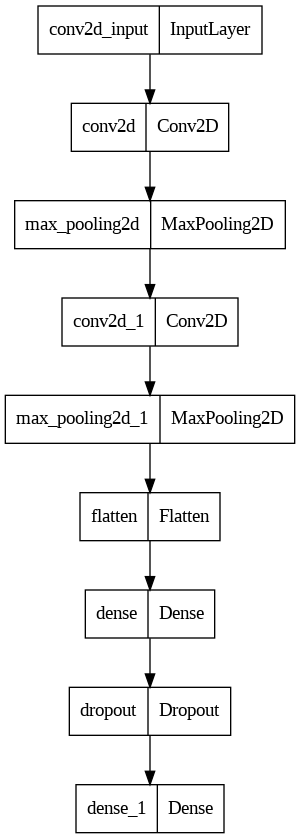

In [9]:
keras.utils.plot_model(model)

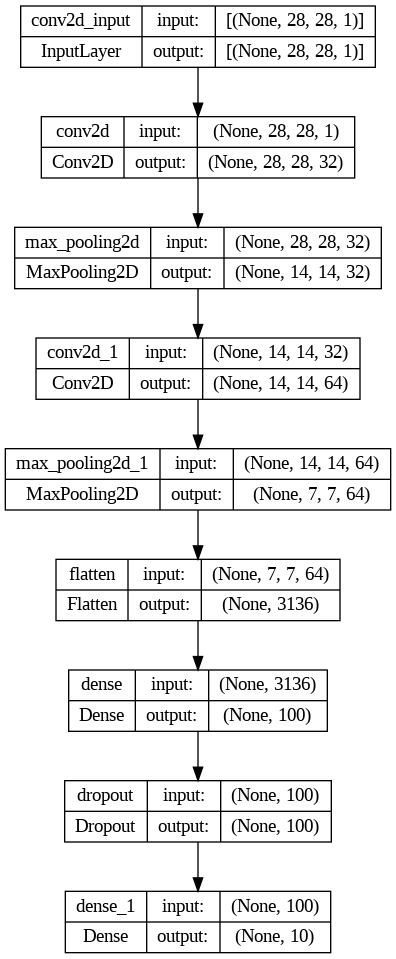

In [10]:
keras.utils.plot_model(model,show_shapes=True)

In [11]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
checkpoint_cb=keras.callbacks.ModelCheckpoint('best-cnn-model.h5',save_best_only=True)
early_stopping_cb=keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True)
history=model.fit(train_scaled,train_target,epochs=20,validation_data=(val_scaled,val_target),callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 19s 6ms/step - loss: 0.5209 - accuracy: 0.8144 - val_loss: 0.3283 - val_accuracy: 0.8788
Epoch 2/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3431 - accuracy: 0.8784 - val_loss: 0.2776 - val_accuracy: 0.8976
Epoch 3/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2930 - accuracy: 0.8932 - val_loss: 0.2536 - val_accuracy: 0.9047
Epoch 4/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2601 - accuracy: 0.9050 - val_loss: 0.2395 - val_accuracy: 0.9119
Epoch 5/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2375 - accuracy: 0.9119 - val_loss: 0.2285 - val_accuracy: 0.9142
Epoch 6/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2171 - accuracy: 0.9203 - val_loss: 0.2295 - val_accuracy: 0.9170
Epoch 7/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1996 - accuracy: 0.9259 - val_loss: 0.2296 - val_accuracy

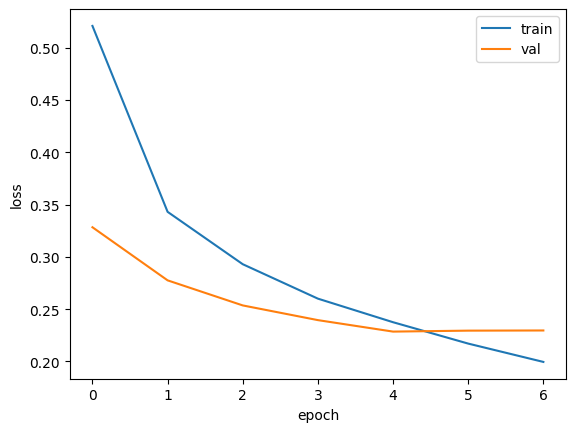

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [13]:
model.evaluate(val_scaled,val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.2285 - accuracy: 0.9142


[0.22854876518249512, 0.9141666889190674]

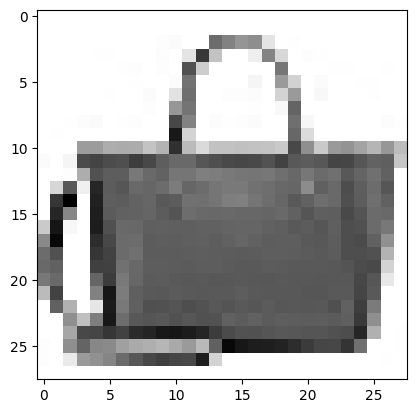

In [14]:
plt.imshow(val_scaled[0].reshape(28,28),cmap='gray_r')
plt.show()

In [15]:
preds=model.predict(val_scaled[0:1])
print(preds)

1/1 [==============================] - 0s 150ms/step
[[1.6153149e-12 2.3402313e-16 1.1695969e-13 5.7517115e-13 2.4088180e-13
  1.3141677e-10 4.5838216e-12 9.0414586e-11 1.0000000e+00 1.5506544e-11]]


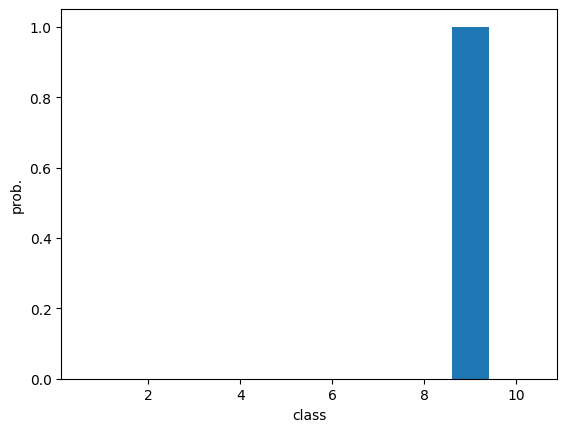

In [16]:
plt.bar(range(1,11),preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [17]:
classes=['티셔츠','바지','스웨터','드레스','코트','샌달','셔츠','스니커즈','가방','앵클 부츠']

In [18]:
import numpy as np

print(classes[np.argmax(preds)])

가방


In [19]:
test_scaled=test_input.reshape(-1,28,28,1) /255.0

In [20]:
model.evaluate(test_scaled,test_target)

313/313 [==============================] - 1s 3ms/step - loss: 0.2479 - accuracy: 0.9100


[0.24789558351039886, 0.9100000262260437]

In [21]:
from tensorflow import keras
model=keras.models.load_model('best-cnn-model.h5')

In [22]:
model.layers

In [23]:
conv=model.layers[0]
print(conv.weights[0].shape,conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [24]:
conv_weights=conv.weights[0].numpy()
print(conv_weights.mean(),conv_weights.std())

-0.030051507 0.21845461


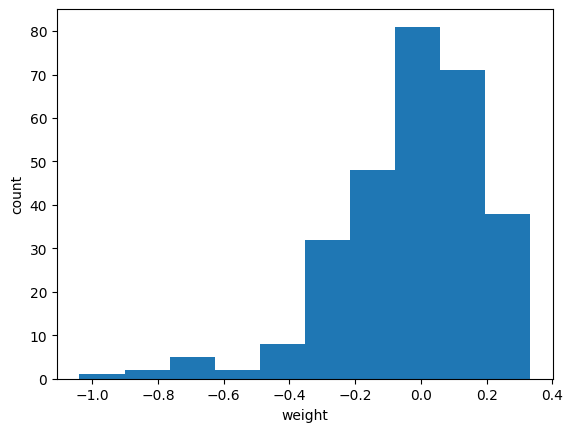

In [27]:
import matplotlib.pyplot as plt

plt.hist(conv_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

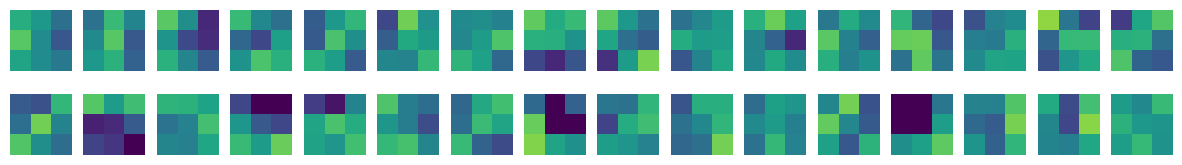

In [29]:
fig,axs=plt.subplots(2,16,figsize=(15,2))
for i in range(2):
    for j in range(16):
        axs[i,j].imshow(conv_weights[:,:,0,i*16+j],vmin=-0.5,vmax=0.5)
        axs[i,j].axis('off')
plt.show()

In [30]:
no_training_model=keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32,kernel_size=3,activation='relu',padding='same',input_shape=(28,28,1)))

In [32]:
no_training_conv=no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [33]:
no_training_weights=no_training_conv.weights[0].numpy()
print(no_training_weights.mean(),no_training_weights.std())

-0.008040161 0.08206132


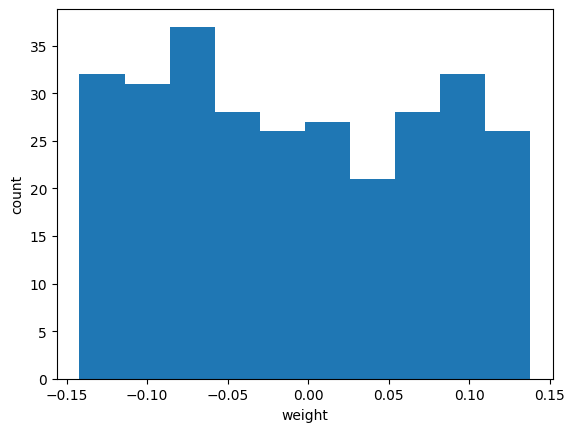

In [34]:
plt.hist(no_training_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

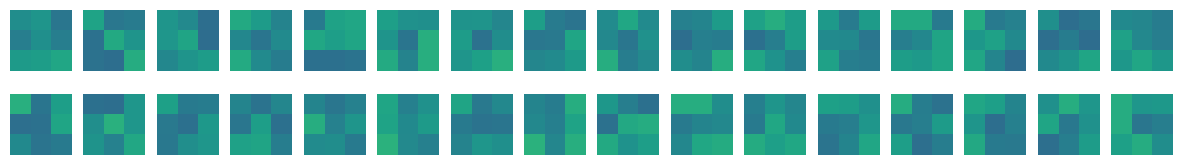

In [35]:
fig,axs=plt.subplots(2,16,figsize=(15,2))
for i in range(2):
    for j in range(16):
        axs[i,j].imshow(no_training_weights[:,:,0,i*16+j],vmin=-0.5,vmax=0.5)
        axs[i,j].axis('off')
plt.show()

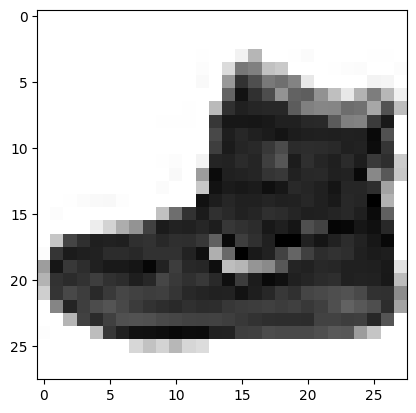

In [36]:
plt.imshow(train_input[0],cmap='gray_r')
plt.show()

In [37]:
conv_acti=keras.Model(model.input,model.layers[0].output)

inputs=train_input[0:1].reshape(-1,28,28,1)/255.0
feature_maps=conv_acti.predict(inputs)

1/1 [==============================] - 0s 71ms/step


In [38]:
print(feature_maps.shape)

(1, 28, 28, 32)


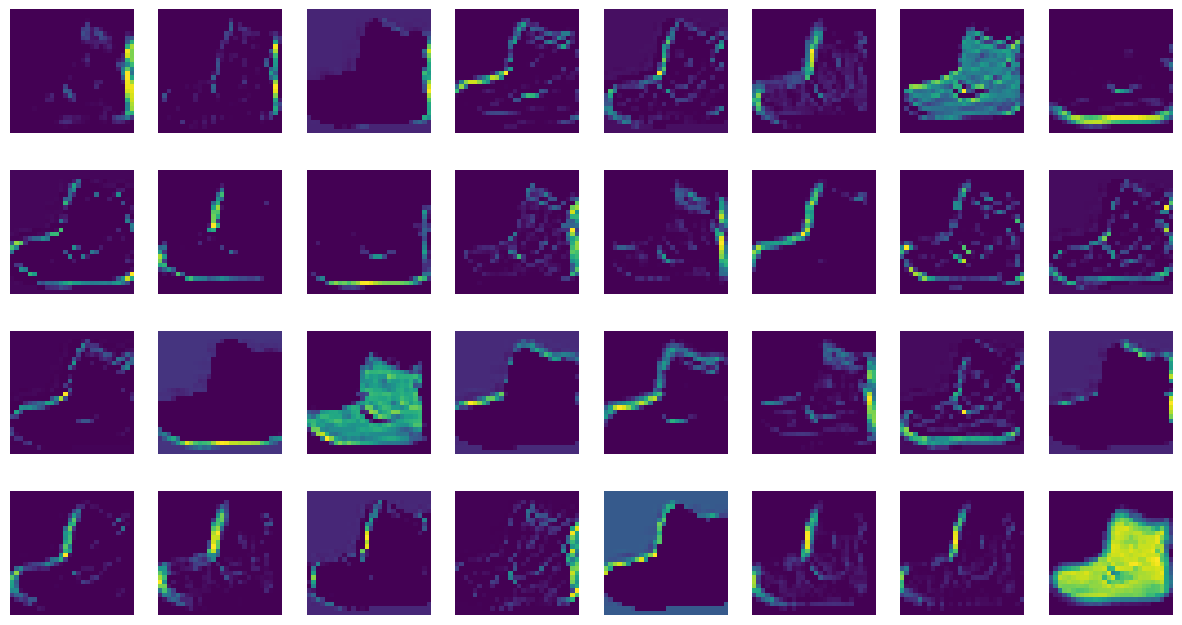

In [40]:
fig,axs=plt.subplots(4,8,figsize=(15,8))
for i in range(4):
    for j in range(8):
        axs[i,j].imshow(feature_maps[0,:,:,i*8+j])
        axs[i,j].axis('off')
plt.show()

In [45]:
conv2_acti=keras.Model(model.input,model.layers[2].output)

In [46]:
inputs=train_input[0:1].reshape(-1,28,28,1)/255.0
feature_maps=conv2_acti.predict(inputs)

1/1 [==============================] - 0s 85ms/step


In [47]:
print(feature_maps.shape)

(1, 14, 14, 64)


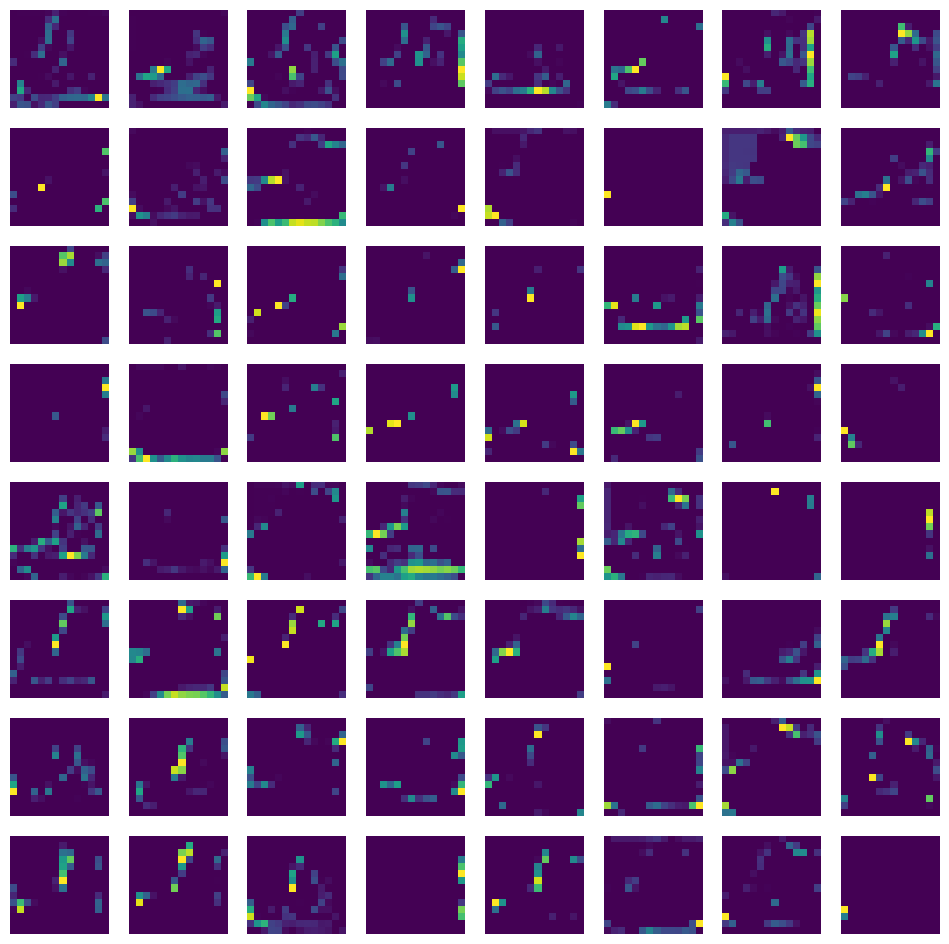

In [48]:
fig,axs=plt.subplots(8,8,figsize=(12,12))
for i in range(8):
    for j in range(8):
        axs[i,j].imshow(feature_maps[0,:,:,i*8+j])
        axs[i,j].axis('off')
plt.show()